In [1]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/..')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        sys.path.remove(lib)
    sys.path.insert(0,lib)

from libs.lib import *
from libs.common import *

g:\My Drive\UII_Project


In [2]:
exps_dir = "../../exps"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42

In [3]:
data= pd.read_excel('../../data/No Finance Banking.xls')

In [4]:
data['ResearchDevFund_ratio']=data.ResearchDevFund/data.TotalRevenue
data['SciTechFund_ratio']=data.SciTechFund/data.TotalRevenue


In [5]:
for i in data.columns:
    print(i)

id
Company
Index
Year
CashRatio
EBIT
EBITDA
GrossProfitMargin
EBITDARatio
EBITRatio
QuickRatio
CurrentRatio
LongDetboverOE
LongDebtoverTA
TotalDebtoverOE
TotalDebtoverTA
ShortDebtoverOE
ShortDebtoverTA
IAoverTA
TAoverOE
EBITDAoverShortDebtandExpenses
EBTMargin
NetProfitMarginRatio
TotalAssetTurnover
TotalEquityRatio
Tỷsuấtlợinhuậntừkinhdoanh
LNSTCFODoanhthu
Giátrịcổphiếu
TotalRevenue
SalesDeductions
NetRevenue
COGS
GrossProfit
RevenueFinancialActivities
FinancialExpenses
InterestExpenses
Lãilỗtừcôngtyliêndoanh
SellingExpenses
AdminExpensesCons
OperatingIncomeCons
OtherRevenue
OtherExpenses
OtherIncome
AccountingIncomePreTax
CorpTaxExpenses
CurrentCorpTax
DeferredIncomeTax
IncomeAfterDefTax
MinorityInterest
Cổđôngcủacôngtymẹ
EarningPerShare
DilutedEarningsPerShare
CURRENTASSETS
Cash
CashEquivalents
ShortTermInvestments
TradingSecurities
AllowanceDeclineInSec
HTMInvestments
CurrentReceivables
CurTradeReceivables
CurAdvancestoSuppliers
RelatedPartiesReceivables
ConstructionReceivables
Sho

In [6]:
# Tính ROA
data['ROA'] = data['IncomeAfterDefTax'] / data['TOTALASSETS']

# Tính ROE
data['ROE'] = data['IncomeAfterDefTax'] / data['OWNERSEQUITY']
data['Intangible Assets']=data['CostIntanFA']/data['TOTALASSETS']
data['Intangible Assets1']=data['AccDepIntanFA']/data['TOTALASSETS']
data['T.Debt']=data['TotalDebtoverOE']/data['TOTALASSETS']
data['T.Debt1']=data['TotalDebtoverTA']/data['TOTALASSETS']
data

,id,Company,Index,Year,CashRatio,EBIT,EBITDA,GrossProfitMargin,EBITDARatio,EBITRatio,...,ExcRateFluctuation,CashandEquiEnd,ResearchDevFund_ratio,SciTechFund_ratio,ROA,ROE,Intangible Assets,Intangible Assets1,T.Debt,T.Debt1
0,A32,Công ty 32,UPCoM,2006,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A32,Công ty 32,UPCoM,2007,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A32,Công ty 32,UPCoM,2008,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A32,Công ty 32,UPCoM,2009,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A32,Công ty 32,UPCoM,2010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26624,YTC,XNK Y tế TP.HCM,UPCoM,2018,0.08,3.617160e+10,4.021374e+10,0.1744,0.0760,0.0683,...,0.0,5.590891e+10,0.038055,0.0,0.018324,0.249297,0.002075,-0.001733,8.037157e-12,5.852299e-13
26625,YTC,XNK Y tế TP.HCM,UPCoM,2019,0.21,3.319102e+10,3.700330e+10,0.1836,0.0726,0.0651,...,-14871234.0,1.388845e+11,0.043871,0.0,0.020102,0.252424,0.002121,-0.001859,6.142000e-12,4.918918e-13
26626,YTC,XNK Y tế TP.HCM,UPCoM,2020,0.03,-1.965803e+10,-1.455882e+10,0.0861,-0.0257,-0.0347,...,0.0,2.481934e+10,0.037316,0.0,-0.012067,-0.892563,0.007714,-0.002540,1.688540e-11,2.310316e-13
26627,YTC,XNK Y tế TP.HCM,UPCoM,2021,0.02,9.693024e+08,5.319168e+09,0.0868,0.0088,0.0016,...,0.0,1.827217e+10,0.000000,0.0,0.013659,0.490421,0.009836,-0.003718,1.297382e-11,3.586050e-13


In [7]:
data.drop_duplicates(inplace=True)

In [8]:
len(data)

26622

In [9]:
data.isnull().sum()

id                       0
Company                  0
Index                    0
Year                     0
CashRatio             5898
                      ... 
ROE                   6770
Intangible Assets     6650
Intangible Assets1    6650
T.Debt                6799
T.Debt1               6790
Length: 204, dtype: int64

In [10]:
len(data)

26622

In [11]:
null_columns = data.columns[data.isnull().any()]
null_columns

Index(['CashRatio', 'EBIT', 'EBITDA', 'GrossProfitMargin', 'EBITDARatio',
       'EBITRatio', 'QuickRatio', 'CurrentRatio', 'LongDetboverOE',
       'LongDebtoverTA',
       ...
       'ExcRateFluctuation', 'CashandEquiEnd', 'ResearchDevFund_ratio',
       'SciTechFund_ratio', 'ROA', 'ROE', 'Intangible Assets',
       'Intangible Assets1', 'T.Debt', 'T.Debt1'],
      dtype='object', length=200)

In [12]:
for i in  data.Company.unique():
    print(i)

Công ty 32
An Phát Bioplastics
Thủy sản Mekong
Tập đoàn Tiên Sơn Thanh Hóa
Việt Tiên Sơn Địa ốc
Truyền thông VMG
Đầu tư Nhãn Hiệu Việt
DV Nông nghiệp Bình Thuận
Thủy sản Bến Tre
Đầu tư và XD Bình Dương ACC
Bê tông An Giang
Gỗ An Cường
Thủy sản CL An Giang
Tập đoàn Khoáng sản Á Cường
Xây lắp Thương mại 2
Cảng Hàng không VN
Mĩ thuật và Truyền thông
Clever Group
Sơn Á Đông
Dệt sợi DAMSAN
Xuất Nhập khẩu Nông sản Thực phẩm An Giang
28.1 JSC
Môi trường Đô thị An Giang
Thủy sản An Giang
Bất động sản An Gia
XNK An Giang
Dược phẩm AGIMEXPHARM
Nông sản Xuất khẩu Sài Gòn
Văn hóa Tân Bình
Xây dựng ALVICO
Khoáng sản Á Châu
FLC Stone
Cơ điện Alphanam
Armephaco
Cơ khí Xây dựng AMECC (Xây dựng LISEMCO 2)
Dược-TB Y tế Việt Mỹ
Rau quả thực phẩm An Giang
Thủy sản Nam Việt
Chiếu xạ An Phú
Nông sản Quảng Ngãi
Tập đoàn An Phát Holdings
Đầu tư Châu Á - Thái Bình Dương
Cơ khí và Thiết bị áp lực - VVMI
Phụ gia và SP Dầu mỏ
Thủy hải sản Sài Gòn
XNK Hàng không
Hàng tiêu dùng ASA
Tập đoàn ASG
Tập đoàn Sao Mai
Dịc

In [13]:
(data=="").sum()

id                    0
Company               0
Index                 0
Year                  0
CashRatio             0
                     ..
ROE                   0
Intangible Assets     0
Intangible Assets1    0
T.Debt                0
T.Debt1               0
Length: 204, dtype: int64

In [14]:
change_category = list((data.select_dtypes('object')).columns)
change_category

['id', 'Company', 'Index']

In [15]:
data[change_category]=data[change_category].astype('category')
data.dtypes

id                    category
Company               category
Index                 category
Year                     int64
CashRatio              float64
                        ...   
ROE                    float64
Intangible Assets      float64
Intangible Assets1     float64
T.Debt                 float64
T.Debt1                float64
Length: 204, dtype: object

In [16]:
category_columns=list((data.select_dtypes('category')).columns)
numeric_columns=list((data.select_dtypes('number')).columns)

In [17]:
# np.savez(f'{save_dir}/columns_dtype.npz', category_columns = category_columns, numeric_columns = numeric_columns)

In [18]:
# data[list((data[null_columns].select_dtypes('number')).columns)]=data[list((data[null_columns].select_dtypes('number')).columns)].interpolate(method='linear')
# 

In [19]:
data.isnull().sum()

id                       0
Company                  0
Index                    0
Year                     0
CashRatio             5898
                      ... 
ROE                   6770
Intangible Assets     6650
Intangible Assets1    6650
T.Debt                6799
T.Debt1               6790
Length: 204, dtype: int64

In [20]:
# data.dropna(inplace=True)
# data.isnull().sum()

In [21]:
len(data)

26622

In [22]:
# for c in numeric_columns:
#     plt.figure()
#     data.boxplot(c, rot=0, grid=True, fontsize=12);
#     plt.show()

In [23]:
# from scipy import stats

# for c in numeric_columns:
#     we=data[c].values

#     zwe=stats.zscore(we)

#     #Ngương 3
#     outliers=np.unique(zwe[[(n<-3)|(n>3) for n in zwe]])
#     indexes=[zwe.tolist().index(i) for i in outliers]
#     print("Indexes of outliers: ", np.unique(indexes))
#     print("Outlier values", we[indexes])


In [24]:
corrle=data[numeric_columns].corr()
corrle

,Year,CashRatio,EBIT,EBITDA,GrossProfitMargin,EBITDARatio,EBITRatio,QuickRatio,CurrentRatio,LongDetboverOE,...,ExcRateFluctuation,CashandEquiEnd,ResearchDevFund_ratio,SciTechFund_ratio,ROA,ROE,Intangible Assets,Intangible Assets1,T.Debt,T.Debt1
Year,1.000000,-0.014939,0.060381,0.077449,0.026418,-0.007683,-0.007826,-0.012830,-0.010622,-0.005930,...,-0.008950,0.050357,0.046087,0.021719,-0.026365,-0.011553,0.005210,-0.058357,-0.021201,0.011042
CashRatio,-0.014939,1.000000,-0.001734,-0.002152,-0.002128,0.000081,0.000085,0.998111,0.996303,-0.000879,...,-0.000004,-0.001035,0.003311,-0.001565,-0.000044,0.000087,-0.003426,0.001309,-0.000316,-0.000133
EBIT,0.060381,-0.001734,1.000000,0.949497,0.044912,0.001738,0.001771,-0.002384,-0.002329,-0.003648,...,-0.014979,0.588861,0.414104,0.164314,0.010173,0.001551,-0.004164,-0.005060,-0.003028,-0.001266
EBITDA,0.077449,-0.002152,0.949497,1.000000,0.040130,0.001862,0.001890,-0.002953,-0.003021,0.003847,...,-0.027072,0.707174,0.432808,0.198605,0.009258,0.001633,-0.002191,-0.010980,-0.003543,-0.001519
GrossProfitMargin,0.026418,-0.002128,0.044912,0.040130,1.000000,0.003010,0.002843,-0.002342,-0.001553,-0.002290,...,-0.003113,0.009918,0.005162,0.005188,0.115075,0.005002,0.017519,-0.018182,-0.000127,-0.003774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ROE,-0.011553,0.000087,0.001551,0.001633,0.005002,0.000109,0.000106,0.000081,0.000159,-0.040117,...,-0.000067,0.001378,0.000603,0.000256,0.493078,1.000000,0.002729,-0.001655,0.029121,0.000077
Intangible Assets,0.005210,-0.003426,-0.004164,-0.002191,0.017519,0.002902,0.002567,-0.003790,-0.003435,-0.007317,...,-0.002369,0.008509,-0.003975,-0.008929,-0.038813,0.002729,1.000000,-0.552857,-0.000663,-0.002616
Intangible Assets1,-0.058357,0.001309,-0.005060,-0.010980,-0.018182,-0.001867,-0.001789,0.001850,0.001608,0.006297,...,0.003854,-0.018050,-0.001720,0.003978,0.036406,-0.001655,-0.552857,1.000000,0.000669,0.001581
T.Debt,-0.021201,-0.000316,-0.003028,-0.003543,-0.000127,0.000153,0.000174,-0.000384,-0.000452,0.120929,...,-0.000040,-0.003233,-0.002149,-0.000950,0.028074,0.029121,-0.000663,0.000669,1.000000,-0.714522


In [25]:
def check_correl(col,corr_num):
    # Chọn các cột có hệ số tương quan với cột "ROA" lớn hơn 0.4 hoặc nhỏ hơn -0.4
    correlation_threshold = corr_num
    high_correlation_columns = corrle[(corrle[col] > correlation_threshold) | (corrle[col] < -correlation_threshold)].index.tolist()

    # Loại bỏ cột "ROA" khỏi danh sách kết quả
    high_correlation_columns.remove(col)

    # In ra các cột có hệ số tương quan cao với cột "ROA"
    print(f"Các cột có hệ số tương quan lớn hơn {correlation_threshold} hoặc nhỏ hơn {-correlation_threshold} với cột {col}:")
    return high_correlation_columns



In [26]:
cor_nums=0.01
high_correlation_columns_scitech=check_correl(col ='SciTechFund_ratio',corr_num=cor_nums)


Các cột có hệ số tương quan lớn hơn 0.01 hoặc nhỏ hơn -0.01 với cột SciTechFund_ratio:


In [27]:
high_correlation_columns_research_dev=check_correl(col ='ResearchDevFund_ratio',corr_num=cor_nums)



Các cột có hệ số tương quan lớn hơn 0.01 hoặc nhỏ hơn -0.01 với cột ResearchDevFund_ratio:


In [28]:
high_correlation_columns_rd=check_correl(col ='ResearchDevFund',corr_num=cor_nums)
high_correlation_columns_st=check_correl(col ='SciTechFund',corr_num=cor_nums)
high_correlation_columns_cash_ratio=check_correl(col ='CashRatio',corr_num=cor_nums)



Các cột có hệ số tương quan lớn hơn 0.01 hoặc nhỏ hơn -0.01 với cột ResearchDevFund:
Các cột có hệ số tương quan lớn hơn 0.01 hoặc nhỏ hơn -0.01 với cột SciTechFund:
Các cột có hệ số tương quan lớn hơn 0.01 hoặc nhỏ hơn -0.01 với cột CashRatio:


In [29]:
high_correlation_columns_IA=check_correl(col ='Intangible Assets',corr_num=cor_nums)
high_correlation_columns_IA1=check_correl(col ='Intangible Assets1',corr_num=cor_nums)
high_correlation_columns_TD=check_correl(col ='T.Debt',corr_num=cor_nums)
high_correlation_columns_TD1=check_correl(col ='T.Debt1',corr_num=cor_nums)


Các cột có hệ số tương quan lớn hơn 0.01 hoặc nhỏ hơn -0.01 với cột Intangible Assets:
Các cột có hệ số tương quan lớn hơn 0.01 hoặc nhỏ hơn -0.01 với cột Intangible Assets1:
Các cột có hệ số tương quan lớn hơn 0.01 hoặc nhỏ hơn -0.01 với cột T.Debt:
Các cột có hệ số tương quan lớn hơn 0.01 hoặc nhỏ hơn -0.01 với cột T.Debt1:


In [30]:
high_correlation_columns_ROE=check_correl(col ='ROE',corr_num=cor_nums)


Các cột có hệ số tương quan lớn hơn 0.01 hoặc nhỏ hơn -0.01 với cột ROE:


In [31]:
for i in [high_correlation_columns_scitech,high_correlation_columns_research_dev,high_correlation_columns_rd,high_correlation_columns_st,high_correlation_columns_cash_ratio,high_correlation_columns_IA,high_correlation_columns_IA1,high_correlation_columns_TD,high_correlation_columns_TD1]:
    print(i)
    if 'ROA' in i:
        print(True)
    else: print(False)

['Year', 'EBIT', 'EBITDA', 'TotalAssetTurnover', 'SalesDeductions', 'COGS', 'GrossProfit', 'RevenueFinancialActivities', 'FinancialExpenses', 'InterestExpenses', 'Lãilỗtừcôngtyliêndoanh', 'SellingExpenses', 'AdminExpensesCons', 'OperatingIncomeCons', 'OtherRevenue', 'OtherExpenses', 'OtherIncome', 'AccountingIncomePreTax', 'CorpTaxExpenses', 'CurrentCorpTax', 'DeferredIncomeTax', 'MinorityInterest', 'Cổđôngcủacôngtymẹ', 'EarningPerShare', 'DilutedEarningsPerShare', 'CURRENTASSETS', 'Cash', 'CashEquivalents', 'ShortTermInvestments', 'TradingSecurities', 'HTMInvestments', 'CurrentReceivables', 'CurTradeReceivables', 'CurAdvancestoSuppliers', 'OtherShortLoanRecei', 'ShortBadDebtProvision', 'AssetShortageAwait', 'Invetories', 'ObsoleteInventories', 'TotalOtherCA', 'ShortPrepaidExpenses', 'VATDeductions', 'TaxandStatutory', 'TOTALNONCURASSETS', 'Longreceivables', 'LongAdvancesSuppliers', 'LongLoanReceivables', 'OtherLongRecei', 'LongBadDebtProvision', 'FixedAssets', 'ResidualValTangFA', 'Co

In [32]:
lst=[]
for s in high_correlation_columns_scitech:
    for r in high_correlation_columns_research_dev:
        if s==r:
            lst.append(s)
            print(s)
        continue

Year
EBIT
EBITDA
TotalAssetTurnover
SalesDeductions
COGS
GrossProfit
RevenueFinancialActivities
FinancialExpenses
InterestExpenses
Lãilỗtừcôngtyliêndoanh
SellingExpenses
AdminExpensesCons
OperatingIncomeCons
OtherRevenue
OtherExpenses
OtherIncome
AccountingIncomePreTax
CorpTaxExpenses
CurrentCorpTax
DeferredIncomeTax
MinorityInterest
Cổđôngcủacôngtymẹ
EarningPerShare
DilutedEarningsPerShare
CURRENTASSETS
Cash
CashEquivalents
ShortTermInvestments
TradingSecurities
HTMInvestments
CurrentReceivables
CurTradeReceivables
CurAdvancestoSuppliers
OtherShortLoanRecei
ShortBadDebtProvision
AssetShortageAwait
Invetories
ObsoleteInventories
TotalOtherCA
ShortPrepaidExpenses
VATDeductions
TaxandStatutory
TOTALNONCURASSETS
Longreceivables
LongAdvancesSuppliers
LongLoanReceivables
OtherLongRecei
LongBadDebtProvision
FixedAssets
ResidualValTangFA
CostTangibleFA
AccDepreTanFA
ResiduIntangFA
CostIntanFA
AccDepIntanFA
NetPropInvestment
CostPropInvest
AccuDepProInv
LongWIPAsset
LongWIPCost
LongConstWIP
To

In [33]:
print(lst)

['Year', 'EBIT', 'EBITDA', 'TotalAssetTurnover', 'SalesDeductions', 'COGS', 'GrossProfit', 'RevenueFinancialActivities', 'FinancialExpenses', 'InterestExpenses', 'Lãilỗtừcôngtyliêndoanh', 'SellingExpenses', 'AdminExpensesCons', 'OperatingIncomeCons', 'OtherRevenue', 'OtherExpenses', 'OtherIncome', 'AccountingIncomePreTax', 'CorpTaxExpenses', 'CurrentCorpTax', 'DeferredIncomeTax', 'MinorityInterest', 'Cổđôngcủacôngtymẹ', 'EarningPerShare', 'DilutedEarningsPerShare', 'CURRENTASSETS', 'Cash', 'CashEquivalents', 'ShortTermInvestments', 'TradingSecurities', 'HTMInvestments', 'CurrentReceivables', 'CurTradeReceivables', 'CurAdvancestoSuppliers', 'OtherShortLoanRecei', 'ShortBadDebtProvision', 'AssetShortageAwait', 'Invetories', 'ObsoleteInventories', 'TotalOtherCA', 'ShortPrepaidExpenses', 'VATDeductions', 'TaxandStatutory', 'TOTALNONCURASSETS', 'Longreceivables', 'LongAdvancesSuppliers', 'LongLoanReceivables', 'OtherLongRecei', 'LongBadDebtProvision', 'FixedAssets', 'ResidualValTangFA', 'Co

In [34]:
# for i in high_correlation_columns:
#     check_correl(i,0.1)

In [35]:
# data[target_cols].isnull().sum()

In [36]:
len(data)

26622

In [37]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def analyze_OLS(cols):

    df = pd.DataFrame(data[cols])
    df.dropna(inplace=True)
    df = df[~np.isinf(df).any(axis=1)]

    print(df.shape)
    x = df.drop(cols[0], axis=1)
    y = df[cols[0]]
    x = sm.add_constant(x)  # Thêm hệ số chặn vào dữ liệu

    # x.dropna(inplace=True)
    # y.dropna(inplace=True)
    # print(x.isnull().sum(),x.shape)

    # x['intercept']=const

  
    model = sm.OLS(y, x,hasconst=True)
    results = model.fit()
    summary = results.summary()
    # print(summary)
    return summary


In [40]:
target_cols=['ROE','CashRatio','ResearchDevFund','IAoverTA','T.Debt1']
print(analyze_OLS(target_cols))

(19773, 5)
                            OLS Regression Results                            
Dep. Variable:                    ROE   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01040
Date:                Fri, 10 May 2024   Prob (F-statistic):              0.999
Time:                        10:06:09   Log-Likelihood:                -79815.
No. Observations:               19773   AIC:                         1.596e+05
Df Residuals:                   19769   BIC:                         1.597e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0662     

In [41]:
target_cols=['ROA','CashRatio','ResearchDevFund','Intangible Assets1','T.Debt']
print(analyze_OLS(target_cols))

(19773, 5)
                            OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     8.871
Date:                Fri, 10 May 2024   Prob (F-statistic):           7.15e-06
Time:                        10:06:40   Log-Likelihood:                -4586.7
No. Observations:               19773   AIC:                             9181.
Df Residuals:                   19769   BIC:                             9213.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.

In [42]:
target_cols=['ROE','CashRatio','ResearchDevFund_ratio','Intangible Assets1','T.Debt']
print(analyze_OLS(target_cols))

(15659, 5)
                            OLS Regression Results                            
Dep. Variable:                    ROE   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.03554
Date:                Fri, 10 May 2024   Prob (F-statistic):              0.991
Time:                        10:07:01   Log-Likelihood:                -65035.
No. Observations:               15659   AIC:                         1.301e+05
Df Residuals:                   15655   BIC:                         1.301e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const              

In [59]:
target_ROA=['ROA','SciTechFund_ratio','ResearchDevFund_ratio']
print(analyze_OLS(target_ROA))

                            OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1073
Date:                Tue, 07 May 2024   Prob (F-statistic):              0.898
Time:                        20:39:35   Log-Likelihood:                -5426.4
No. Observations:               15698   AIC:                         1.086e+04
Df Residuals:                   15695   BIC:                         1.088e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.01

In [58]:
target_ROE=['ROE','SciTechFund_ratio','ResearchDevFund_ratio']
print(analyze_OLS(target_ROE))

                                 OLS Regression Results                                
Dep. Variable:                    ROE   R-squared (uncentered):                     nan
Model:                            OLS   Adj. R-squared (uncentered):                nan
Method:                 Least Squares   F-statistic:                                nan
Date:                Tue, 07 May 2024   Prob (F-statistic):                         nan
Time:                        20:17:41   Log-Likelihood:                             nan
No. Observations:               15698   AIC:                                        nan
Df Residuals:                   15696   BIC:                                        nan
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [33]:
for i in data.columns:
    print(i)

id
Company
Index
Year
CashRatio
EBIT
EBITDA
GrossProfitMargin
EBITDARatio
EBITRatio
QuickRatio
CurrentRatio
LongDetboverOE
LongDebtoverTA
TotalDebtoverOE
TotalDebtoverTA
ShortDebtoverOE
ShortDebtoverTA
IAoverTA
TAoverOE
EBITDAoverShortDebtandExpenses
EBTMargin
NetProfitMarginRatio
TotalAssetTurnover
TotalEquityRatio
Tỷsuấtlợinhuậntừkinhdoanh
LNSTCFODoanhthu
Giátrịcổphiếu
TotalRevenue
SalesDeductions
NetRevenue
COGS
GrossProfit
RevenueFinancialActivities
FinancialExpenses
InterestExpenses
Lãilỗtừcôngtyliêndoanh
SellingExpenses
AdminExpensesCons
OperatingIncomeCons
OtherRevenue
OtherExpenses
OtherIncome
AccountingIncomePreTax
CorpTaxExpenses
CurrentCorpTax
DeferredIncomeTax
IncomeAfterDefTax
MinorityInterest
Cổđôngcủacôngtymẹ
EarningPerShare
DilutedEarningsPerShare
CURRENTASSETS
Cash
CashEquivalents
ShortTermInvestments
TradingSecurities
AllowanceDeclineInSec
HTMInvestments
CurrentReceivables
CurTradeReceivables
CurAdvancestoSuppliers
RelatedPartiesReceivables
ConstructionReceivables
Sho

In [34]:
target_cols =['CashRatio','IAoverTA','TotalDebtoverTA','IncomeAfterDefTax','TOTALASSETS','OWNERSEQUITY','GrossProfitMargin','TotalRevenue','NetRevenue','SciTechFund','StabliFund','WelfareFund','ResearchDevFund','OtherOEFunds','ToOtherOEFund','ConstructInvestFund']

In [35]:
df = data[target_cols]
df

,CashRatio,IAoverTA,TotalDebtoverTA,IncomeAfterDefTax,TOTALASSETS,OWNERSEQUITY,GrossProfitMargin,TotalRevenue,NetRevenue,SciTechFund,StabliFund,WelfareFund,ResearchDevFund,OtherOEFunds,ToOtherOEFund,ConstructInvestFund
13,0.29,0.0,0.02,4.696082e+10,4.349303e+11,2.236127e+11,0.1190,6.914857e+11,6.914857e+11,0.0,0.0,3.408345e+09,9.598561e+10,0.0,-3.200000e+06,0.0
14,0.18,0.0,0.00,4.210703e+10,4.882955e+11,2.422169e+11,0.1092,7.285825e+11,7.285810e+11,0.0,0.0,4.099816e+09,1.124009e+11,0.0,-5.910000e+06,0.0
173,0.13,0.0,0.27,1.169601e+10,9.536726e+10,3.470620e+10,0.1693,1.499534e+11,1.499534e+11,0.0,0.0,1.856278e+09,1.972125e+09,339582560.0,2.126898e+09,0.0
174,0.11,0.0,0.24,1.584879e+10,1.039423e+11,4.135188e+10,0.1884,1.892221e+11,1.892048e+11,0.0,0.0,1.951209e+09,5.628849e+09,579582560.0,2.442280e+08,0.0
175,0.06,0.0,0.33,1.558098e+10,1.578069e+11,4.996923e+10,0.1686,2.422126e+11,2.422126e+11,0.0,0.0,3.923084e+08,1.035813e+10,869582560.0,3.783667e+07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25913,0.12,0.0,0.32,2.983073e+09,3.404461e+11,1.717468e+11,0.0758,5.644257e+11,5.639223e+11,0.0,0.0,6.180043e+08,7.637175e+09,0.0,0.000000e+00,0.0
26097,0.22,0.0,0.11,5.800466e+10,1.207865e+12,2.247274e+11,0.0648,7.238654e+12,7.233168e+12,0.0,0.0,9.496144e+09,1.600432e+10,0.0,0.000000e+00,0.0
26232,0.20,0.0,0.17,7.038045e+09,2.577538e+11,4.721532e+10,0.0813,2.837536e+11,2.837536e+11,0.0,0.0,0.000000e+00,1.702881e+10,0.0,0.000000e+00,0.0
26233,0.10,0.0,0.17,7.267925e+09,2.787718e+11,4.955662e+10,0.0866,2.869302e+11,2.869302e+11,0.0,0.0,2.084966e+08,1.673740e+10,0.0,0.000000e+00,0.0


In [36]:
df.dropna(inplace=True)

In [37]:
df

,CashRatio,IAoverTA,TotalDebtoverTA,IncomeAfterDefTax,TOTALASSETS,OWNERSEQUITY,GrossProfitMargin,TotalRevenue,NetRevenue,SciTechFund,StabliFund,WelfareFund,ResearchDevFund,OtherOEFunds,ToOtherOEFund,ConstructInvestFund
13,0.29,0.0,0.02,4.696082e+10,4.349303e+11,2.236127e+11,0.1190,6.914857e+11,6.914857e+11,0.0,0.0,3.408345e+09,9.598561e+10,0.0,-3.200000e+06,0.0
14,0.18,0.0,0.00,4.210703e+10,4.882955e+11,2.422169e+11,0.1092,7.285825e+11,7.285810e+11,0.0,0.0,4.099816e+09,1.124009e+11,0.0,-5.910000e+06,0.0
173,0.13,0.0,0.27,1.169601e+10,9.536726e+10,3.470620e+10,0.1693,1.499534e+11,1.499534e+11,0.0,0.0,1.856278e+09,1.972125e+09,339582560.0,2.126898e+09,0.0
174,0.11,0.0,0.24,1.584879e+10,1.039423e+11,4.135188e+10,0.1884,1.892221e+11,1.892048e+11,0.0,0.0,1.951209e+09,5.628849e+09,579582560.0,2.442280e+08,0.0
175,0.06,0.0,0.33,1.558098e+10,1.578069e+11,4.996923e+10,0.1686,2.422126e+11,2.422126e+11,0.0,0.0,3.923084e+08,1.035813e+10,869582560.0,3.783667e+07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25913,0.12,0.0,0.32,2.983073e+09,3.404461e+11,1.717468e+11,0.0758,5.644257e+11,5.639223e+11,0.0,0.0,6.180043e+08,7.637175e+09,0.0,0.000000e+00,0.0
26097,0.22,0.0,0.11,5.800466e+10,1.207865e+12,2.247274e+11,0.0648,7.238654e+12,7.233168e+12,0.0,0.0,9.496144e+09,1.600432e+10,0.0,0.000000e+00,0.0
26232,0.20,0.0,0.17,7.038045e+09,2.577538e+11,4.721532e+10,0.0813,2.837536e+11,2.837536e+11,0.0,0.0,0.000000e+00,1.702881e+10,0.0,0.000000e+00,0.0
26233,0.10,0.0,0.17,7.267925e+09,2.787718e+11,4.955662e+10,0.0866,2.869302e+11,2.869302e+11,0.0,0.0,2.084966e+08,1.673740e+10,0.0,0.000000e+00,0.0


In [38]:
# Tính ROA
df['ROA'] = df['IncomeAfterDefTax'] / df['TOTALASSETS']

# Tính ROE
df['ROE'] = df['IncomeAfterDefTax'] / df['OWNERSEQUITY']
df

,CashRatio,IAoverTA,TotalDebtoverTA,IncomeAfterDefTax,TOTALASSETS,OWNERSEQUITY,GrossProfitMargin,TotalRevenue,NetRevenue,SciTechFund,StabliFund,WelfareFund,ResearchDevFund,OtherOEFunds,ToOtherOEFund,ConstructInvestFund,ROA,ROE
13,0.29,0.0,0.02,4.696082e+10,4.349303e+11,2.236127e+11,0.1190,6.914857e+11,6.914857e+11,0.0,0.0,3.408345e+09,9.598561e+10,0.0,-3.200000e+06,0.0,0.107973,0.210010
14,0.18,0.0,0.00,4.210703e+10,4.882955e+11,2.422169e+11,0.1092,7.285825e+11,7.285810e+11,0.0,0.0,4.099816e+09,1.124009e+11,0.0,-5.910000e+06,0.0,0.086233,0.173840
173,0.13,0.0,0.27,1.169601e+10,9.536726e+10,3.470620e+10,0.1693,1.499534e+11,1.499534e+11,0.0,0.0,1.856278e+09,1.972125e+09,339582560.0,2.126898e+09,0.0,0.122642,0.337001
174,0.11,0.0,0.24,1.584879e+10,1.039423e+11,4.135188e+10,0.1884,1.892221e+11,1.892048e+11,0.0,0.0,1.951209e+09,5.628849e+09,579582560.0,2.442280e+08,0.0,0.152477,0.383267
175,0.06,0.0,0.33,1.558098e+10,1.578069e+11,4.996923e+10,0.1686,2.422126e+11,2.422126e+11,0.0,0.0,3.923084e+08,1.035813e+10,869582560.0,3.783667e+07,0.0,0.098734,0.311811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25913,0.12,0.0,0.32,2.983073e+09,3.404461e+11,1.717468e+11,0.0758,5.644257e+11,5.639223e+11,0.0,0.0,6.180043e+08,7.637175e+09,0.0,0.000000e+00,0.0,0.008762,0.017369
26097,0.22,0.0,0.11,5.800466e+10,1.207865e+12,2.247274e+11,0.0648,7.238654e+12,7.233168e+12,0.0,0.0,9.496144e+09,1.600432e+10,0.0,0.000000e+00,0.0,0.048022,0.258111
26232,0.20,0.0,0.17,7.038045e+09,2.577538e+11,4.721532e+10,0.0813,2.837536e+11,2.837536e+11,0.0,0.0,0.000000e+00,1.702881e+10,0.0,0.000000e+00,0.0,0.027305,0.149063
26233,0.10,0.0,0.17,7.267925e+09,2.787718e+11,4.955662e+10,0.0866,2.869302e+11,2.869302e+11,0.0,0.0,2.084966e+08,1.673740e+10,0.0,0.000000e+00,0.0,0.026071,0.146659


In [39]:
corrle=df.corr()
corrle

,CashRatio,IAoverTA,TotalDebtoverTA,IncomeAfterDefTax,TOTALASSETS,OWNERSEQUITY,GrossProfitMargin,TotalRevenue,NetRevenue,SciTechFund,StabliFund,WelfareFund,ResearchDevFund,OtherOEFunds,ToOtherOEFund,ConstructInvestFund,ROA,ROE
CashRatio,1.000000,0.049227,-0.289858,0.085723,0.083510,0.126388,0.153060,-0.058912,-0.058401,-0.060155,NaN,0.017261,0.100455,-0.044097,0.214523,-0.034417,0.043838,-0.020518
IAoverTA,0.049227,1.000000,-0.083283,-0.032968,-0.062297,-0.048664,-0.034446,0.039670,0.039310,-0.031829,NaN,-0.022369,0.068895,0.026549,-0.037156,-0.020767,0.066359,-0.023280
TotalDebtoverTA,-0.289858,-0.083283,1.000000,0.019391,0.110420,0.082503,-0.052225,0.231675,0.230350,-0.032392,NaN,0.087650,-0.030464,0.110610,-0.054316,-0.043157,-0.077858,-0.004097
IncomeAfterDefTax,0.085723,-0.032968,0.019391,1.000000,0.874638,0.580237,0.524509,0.178121,0.177516,0.263090,NaN,0.396741,0.615425,0.039100,0.004226,-0.032557,0.316851,0.535274
TOTALASSETS,0.083510,-0.062297,0.110420,0.874638,1.000000,0.729825,0.380160,0.239937,0.239587,0.217318,NaN,0.413584,0.556014,0.108331,0.199825,0.061123,-0.028275,0.240651
OWNERSEQUITY,0.126388,-0.048664,0.082503,0.580237,0.729825,1.000000,0.221336,0.181640,0.181021,0.396369,NaN,0.522768,0.439607,0.067533,0.450256,0.186578,-0.009578,-0.045837
GrossProfitMargin,0.153060,-0.034446,-0.052225,0.524509,0.380160,0.221336,1.000000,-0.188510,-0.188400,0.030861,NaN,0.129130,0.242248,-0.055268,-0.025131,-0.046660,0.292457,0.304986
TotalRevenue,-0.058912,0.039670,0.231675,0.178121,0.239937,0.181640,-0.188510,1.000000,0.999980,0.076012,NaN,0.165634,0.188405,0.108611,-0.035827,-0.018547,0.011556,0.094875
NetRevenue,-0.058401,0.039310,0.230350,0.177516,0.239587,0.181021,-0.188400,0.999980,1.000000,0.075385,NaN,0.165746,0.187951,0.106976,-0.035575,-0.018267,0.011290,0.094878
SciTechFund,-0.060155,-0.031829,-0.032392,0.263090,0.217318,0.396369,0.030861,0.076012,0.075385,1.000000,NaN,0.159855,0.623682,-0.028065,-0.012082,-0.025776,0.046545,-0.001008


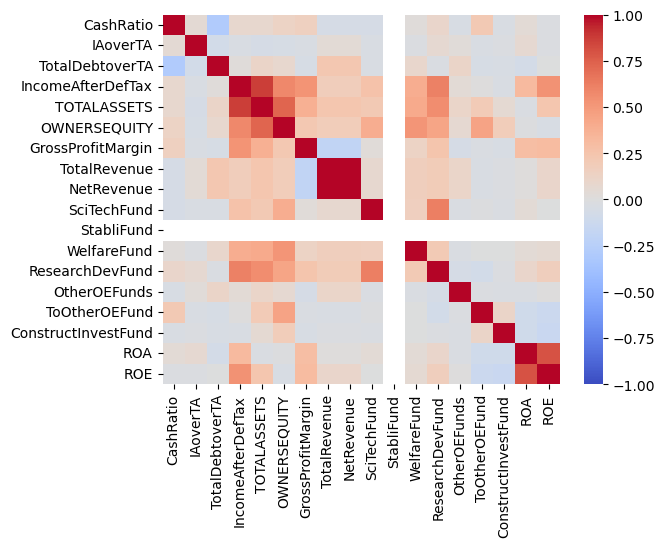

In [40]:
sns.heatmap(corrle,vmin=-1,vmax=1, annot=False, fmt=".2f",cmap='coolwarm')
plt.show()

In [41]:
regress_cols=['CashRatio','IAoverTA','TotalDebtoverTA','ResearchDevFund','ROA','ROE','GrossProfitMargin','TotalRevenue']
regression1=df[regress_cols]
regression1

,CashRatio,IAoverTA,TotalDebtoverTA,ResearchDevFund,ROA,ROE,GrossProfitMargin,TotalRevenue
13,0.29,0.0,0.02,9.598561e+10,0.107973,0.210010,0.1190,6.914857e+11
14,0.18,0.0,0.00,1.124009e+11,0.086233,0.173840,0.1092,7.285825e+11
173,0.13,0.0,0.27,1.972125e+09,0.122642,0.337001,0.1693,1.499534e+11
174,0.11,0.0,0.24,5.628849e+09,0.152477,0.383267,0.1884,1.892221e+11
175,0.06,0.0,0.33,1.035813e+10,0.098734,0.311811,0.1686,2.422126e+11
...,...,...,...,...,...,...,...,...
25913,0.12,0.0,0.32,7.637175e+09,0.008762,0.017369,0.0758,5.644257e+11
26097,0.22,0.0,0.11,1.600432e+10,0.048022,0.258111,0.0648,7.238654e+12
26232,0.20,0.0,0.17,1.702881e+10,0.027305,0.149063,0.0813,2.837536e+11
26233,0.10,0.0,0.17,1.673740e+10,0.026071,0.146659,0.0866,2.869302e+11


In [42]:
corrle1=regression1.corr()
corrle1

,CashRatio,IAoverTA,TotalDebtoverTA,ResearchDevFund,ROA,ROE,GrossProfitMargin,TotalRevenue
CashRatio,1.000000,0.049227,-0.289858,0.100455,0.043838,-0.020518,0.153060,-0.058912
IAoverTA,0.049227,1.000000,-0.083283,0.068895,0.066359,-0.023280,-0.034446,0.039670
TotalDebtoverTA,-0.289858,-0.083283,1.000000,-0.030464,-0.077858,-0.004097,-0.052225,0.231675
ResearchDevFund,0.100455,0.068895,-0.030464,1.000000,0.101039,0.170799,0.242248,0.188405
ROA,0.043838,0.066359,-0.077858,0.101039,1.000000,0.800658,0.292457,0.011556
ROE,-0.020518,-0.023280,-0.004097,0.170799,0.800658,1.000000,0.304986,0.094875
GrossProfitMargin,0.153060,-0.034446,-0.052225,0.242248,0.292457,0.304986,1.000000,-0.188510
TotalRevenue,-0.058912,0.039670,0.231675,0.188405,0.011556,0.094875,-0.188510,1.000000


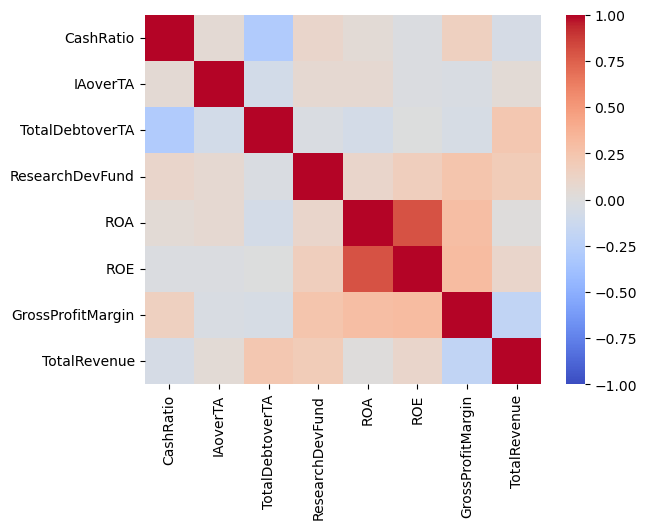

In [43]:
sns.heatmap(corrle1,vmin=-1,vmax=1, annot=False, fmt=".2f",cmap='coolwarm')
plt.show()

In [44]:
regression=regression1[['ROA','ROE','GrossProfitMargin','TotalDebtoverTA']]
import numpy as np

# Đếm số lượng giá trị vô cực trong từng cột của DataFrame df
infinite_values_per_column = np.isinf(regression).sum(axis=0)

print("Số lượng giá trị vô cực trong từng cột:")
print(infinite_values_per_column)



Số lượng giá trị vô cực trong từng cột:
ROA                  0
ROE                  0
GrossProfitMargin    0
TotalDebtoverTA      0
dtype: int64


In [45]:

# Xóa các hàng chứa giá trị vô cực từ DataFrame df
regression = regression.replace([np.inf, -np.inf], np.nan)  # Chuyển các giá trị vô cực thành NaN
regression = regression.dropna(axis=0)  # Loại bỏ các hàng chứa NaN

# Bạn cũng có thể chỉ định các cột cụ thể nếu muốn
# df_cleaned = df.dropna(axis=0, subset=['column1', 'column2'])

# Sử dụng df_cleaned để tiếp tục phân tích hoặc xây dựng mô hình

In [46]:
regression.dropna(inplace=True)
regression.isnull().sum()

ROA                  0
ROE                  0
GrossProfitMargin    0
TotalDebtoverTA      0
dtype: int64

In [47]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# scaler = StandardScaler()
# regression = scaler.fit_transform(regression)
# regression = pd.DataFrame(regression, columns=['ROA','TotalDebtoverTA'])  # Thay 'column_names' bằng tên cột thích hợp


In [48]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Tạo DataFrame từ dữ liệu


# Scale dữ liệu
# Sử dụng StandardScaler
# regression = np.log(regression)
x=regression.drop('ROA',axis=1)
y=regression['ROA']
print(x.shape,y.shape)

# Check for infinite values
print("Infinite values in x:", np.any(np.isinf(x)))

# Check for missing values (NaNs)
print("Missing values (NaNs) in x:", np.any(np.isnan(x)))

# scaler = StandardScaler()
# Sử dụng MinMaxScaler
# scaler = MinMaxScaler()
scaler = RobustScaler()
x = scaler.fit_transform(x)
# x = pd.DataFrame(x, columns=['TotalDebtoverTA'])  # Thay 'column_names' bằng tên cột thích hợp

# Thêm cột hằng 1 vào DataFrame để tính intercept trong mô hình
# x = np.column_stack((x, np.ones(x.shape[0])))
# x_values = x.values
# y_values = y.values

# Phân tích hồi quy tuyến tính
model = sm.OLS(y, x)
results = model.fit()

# Tạo bảng thống kê tuyến tính
summary = results.summary()
print(summary)


(266, 3) (266,)
Infinite values in x: False
Missing values (NaNs) in x: False
                                 OLS Regression Results                                
Dep. Variable:                    ROA   R-squared (uncentered):                   0.442
Model:                            OLS   Adj. R-squared (uncentered):              0.436
Method:                 Least Squares   F-statistic:                              69.47
Date:                Tue, 07 May 2024   Prob (F-statistic):                    4.06e-33
Time:                        09:44:33   Log-Likelihood:                          368.15
No. Observations:                 266   AIC:                                     -730.3
Df Residuals:                     263   BIC:                                     -719.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          

In [49]:
y

13       0.107973
14       0.086233
173      0.122642
174      0.152477
175      0.098734
           ...   
25913    0.008762
26097    0.048022
26232    0.027305
26233    0.026071
26234    0.018813
Name: ROA, Length: 266, dtype: float64

In [50]:
import pandas as pd
import statsmodels.api as sm


df = pd.DataFrame(data)

# Thêm cột hằng 1 vào DataFrame để tính intercept trong mô hình
df['intercept'] = 1

# Phân tích hồi quy tuyến tính
model = sm.OLS(df['Y'], df[['X', 'intercept']])
results = model.fit()

# Tạo bảng thống kê tuyến tính
summary = results.summary()
print(summary)

KeyError: 'Y'

In [ ]:
import pandas as pd
import statsmodels.api as sm

    # Tạo DataFrame từ dữ liệu
data = {
    'X': [1, 2, 3, 4, 5],
    'Y': [2, 3, 5, 4, 6],
}
df = pd.DataFrame(data)

# Thêm cột hằng 1 vào DataFrame để tính intercept trong mô hình
df['intercept'] = 1

# Phân tích hồi quy tuyến tính
model = sm.OLS(df['Y'], df[['X', 'intercept']])
results = model.fit()

# Tạo bảng thống kê tuyến tính
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     12.79
Date:                Sat, 04 May 2024   Prob (F-statistic):             0.0374
Time:                        19:59:26   Log-Likelihood:                -4.6757
No. Observations:                   5   AIC:                             13.35
Df Residuals:                       3   BIC:                             12.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.9000      0.252      3.576      0.0

c:\Users\PC\miniconda3\envs\uii_prj\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.

